In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import numpy as np
import pandas as pd
from scipy.signal import resample
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.utils import to_categorical

In [ ]:
import pandas as pd

file_path = '/content/Text_Dataset_V2.csv'

df = pd.read_csv(file_path)

input_text = df['content'].tolist()
labels = df['sentiment'].tolist()

data = pd.DataFrame({'input': input_text, 'sentiment': labels})

print(data.head())  # To verify the output

In [1]:
import pandas as pd

file_path = 'E:/College/Training/Shabab Mobtakeron/Final Project/Dataset/Text_Dataset_V2.csv' 

df = pd.read_csv(file_path)

input_text = df['content'].tolist()
labels = df['sentiment'].tolist()

data = pd.DataFrame({'input': input_text, 'sentiment': labels})

print(data.head())  # To verify the output

                                               input sentiment
0  im feeling rather rotten so im not very ambiti...       sad
1          im updating my blog because i feel shitty       sad
2  i never make her separate from me because i do...       sad
3    i was feeling a little vain when i did this one       sad
4  i cant walk into a shop anywhere where i do no...      fear


In [4]:
data['input'] = data['input'].apply(lambda x: str(x) if not isinstance(x, str) else x)
data['num_words'] = data['input'].apply(lambda x: len(x.split()))

In [5]:
data.dropna(inplace = True)

In [6]:
labels = list(data.sentiment.unique())
data['sentiment'] = data.sentiment.astype('category')
data['sentiment'] = data.sentiment.cat.codes
data['sentiment'] = data.sentiment.astype('int')
labels_encoded = list(data.sentiment.unique())
sentiment_mapping = {key: int(value) for key, value in zip(labels, labels_encoded)}

In [7]:
sentiment_mapping


{'sad': 5, 'fear': 2, 'anger': 0, 'neutral': 4, 'disgust': 1, 'happy': 3}

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25668 entries, 0 to 25667
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   input      25668 non-null  object
 1   sentiment  25668 non-null  int32 
 2   num_words  25668 non-null  int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 501.5+ KB


In [9]:
data.head()


,input,sentiment,num_words
0,im feeling rather rotten so im not very ambiti...,5,11
1,im updating my blog because i feel shitty,5,8
2,i never make her separate from me because i do...,5,22
3,i was feeling a little vain when i did this one,5,11
4,i cant walk into a shop anywhere where i do no...,2,13


In [10]:
inverted_sentiment_mapping = {v: k for k, v in sentiment_mapping.items()}

data['label_name'] = data['sentiment'].map(inverted_sentiment_mapping)

data.head()

,input,sentiment,num_words,label_name
0,im feeling rather rotten so im not very ambiti...,5,11,sad
1,im updating my blog because i feel shitty,5,8,sad
2,i never make her separate from me because i do...,5,22,sad
3,i was feeling a little vain when i did this one,5,11,sad
4,i cant walk into a shop anywhere where i do no...,2,13,fear


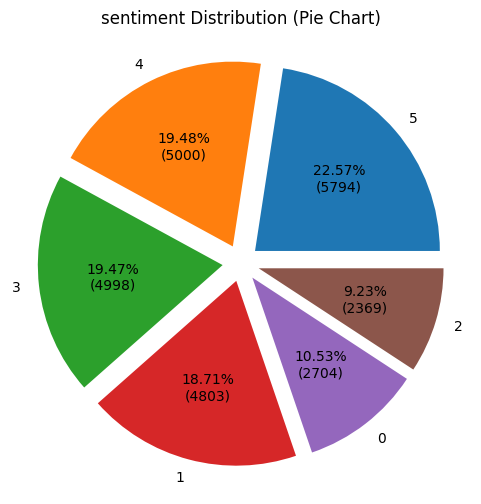

In [11]:
view = dict(data['sentiment'].value_counts()) 

plt.figure(figsize=(6, 6))  

explode = [0.1] * len(view)  

plt.pie(
    list(view.values()), 
    labels=list(view.keys()), 
    autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p, p * sum(view.values()) / 100), 
    explode=explode
)

plt.title("sentiment Distribution (Pie Chart)") 
plt.show()


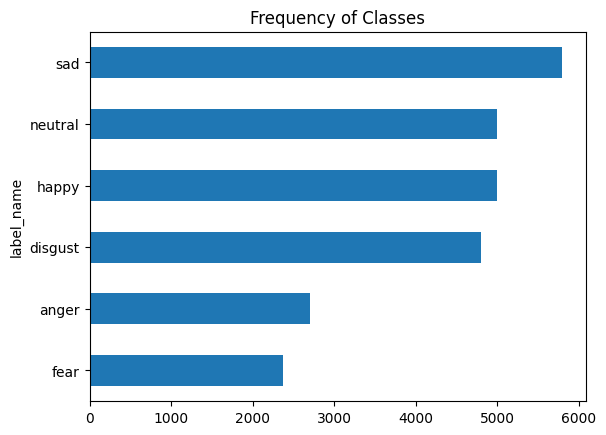

In [12]:
import matplotlib.pyplot as plt

data["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

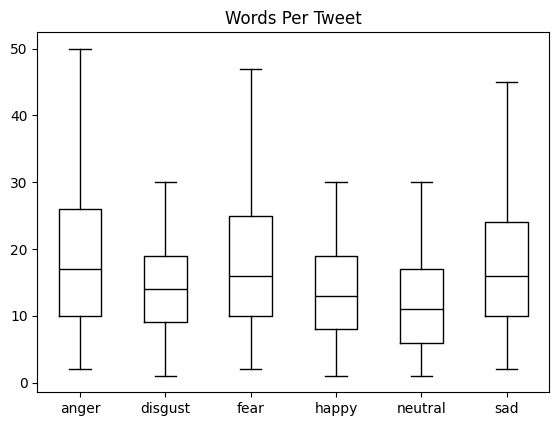

In [13]:
data_cleaned = data.dropna(subset=['input'])

data_cleaned["Words Per Tweet"] = data_cleaned["input"].str.split().apply(len)
data_cleaned.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [14]:
data_train ,data_test  = train_test_split(data , test_size = 0.3, random_state = 42, stratify = data.sentiment)


In [15]:
data_train.shape


(17967, 4)

In [16]:
data_test.shape


(7701, 4)

In [17]:
data_train.head()


,input,sentiment,num_words,label_name
4292,i feel embarrassed though think really red fac...,5,25,sad
7590,i feel lethargic and unmotivated in the mornin...,5,33,sad
11420,im torn i watched it twice but only twice also...,4,20,neutral
8982,i feel like theyre being rude in the first pla...,0,30,anger
3337,i feel so pained to see students on a school trip,5,11,sad


In [18]:
from transformers import AutoTokenizer

model_ckpt = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [19]:
def tokenize(batch):
    return tokenizer(batch["input"], padding=True, truncation=True)

In [20]:
tokenizer('hello this me Alaa')

{'input_ids': [101, 19082, 1142, 1143, 2586, 22118, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [21]:
#hide_input
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [23]:
x_train = tokenizer(
    text = data_train.input.tolist(),
    truncation = True,
    padding = True)

In [24]:
x_test = tokenizer(
    text = data_test.input.tolist(),
    truncation = True,
    padding = True)

In [25]:
text_train = list(data_train.input)
label_train = list(data_train.sentiment)
input_ids_train = x_train["input_ids"]
attn_mask_train = x_train["attention_mask"]

train_dataset = pd.DataFrame({'text': text_train, 'label': label_train, 'input_ids': input_ids_train, 'attention_mask': attn_mask_train})
train_dataset.head()

,text,label,input_ids,attention_mask
0,i feel embarrassed though think really red fac...,5,"[101, 178, 1631, 10529, 1463, 1341, 1541, 1894...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,i feel lethargic and unmotivated in the mornin...,5,"[101, 178, 1631, 1519, 7111, 11007, 1105, 8362...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,im torn i watched it twice but only twice also...,4,"[101, 13280, 7820, 178, 2542, 1122, 3059, 1133...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,i feel like theyre being rude in the first pla...,0,"[101, 178, 1631, 1176, 1152, 1874, 1217, 14708...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,i feel so pained to see students on a school trip,5,"[101, 178, 1631, 1177, 24794, 1106, 1267, 1651...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."


In [26]:
text_test = list(data_test.input)
label_test = list(data_test.sentiment)
input_ids_test = x_test["input_ids"]
attn_mask_test = x_test["attention_mask"]

test_dataset = pd.DataFrame({'text': text_test, 'label': label_test, 'input_ids': input_ids_test, 'attention_mask': attn_mask_test})
test_dataset.head()

,text,label,input_ids,attention_mask
0,i feel ive been physically uncomfortable for t...,2,"[101, 178, 1631, 178, 2707, 1151, 8027, 8504, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,i love to be beside the ocean when i feel dist...,2,"[101, 178, 1567, 1106, 1129, 3148, 1103, 5969,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ..."
2,i am feeling doubtful confused lost and what not,2,"[101, 178, 1821, 2296, 25889, 4853, 1575, 1105...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ..."
3,im still feeling a little shaken,2,"[101, 13280, 1253, 2296, 170, 1376, 18673, 102...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,i still feel guilty to this day for taking a spot,5,"[101, 178, 1253, 1631, 5425, 1106, 1142, 1285,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."


In [27]:
test_dataset.keys()

Index(['text', 'label', 'input_ids', 'attention_mask'], dtype='object')

In [28]:
train_dataset.keys()

Index(['text', 'label', 'input_ids', 'attention_mask'], dtype='object')

In [29]:
import torch
from torch.utils.data import Dataset, DataLoader

class EmotionDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        text = row['text']
        label = row['label']
        input_ids = torch.tensor(row['input_ids'])
        attention_mask = torch.tensor(row['attention_mask'])
        return {
            'text': text,
            'label': label,
            'input_ids': input_ids,
            'attention_mask': attention_mask
        }
train_ds = EmotionDataset(train_dataset)
test_ds = EmotionDataset(test_dataset)

In [30]:
from transformers import AutoModelForSequenceClassification
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels, id2label=inverted_sentiment_mapping, label2id=sentiment_mapping)
         .to(device))

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}


In [32]:
len(data_train.input)


17967

In [36]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(data_train.input) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=1,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  report_to = "none")

In [37]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=train_ds,
                  eval_dataset=test_ds,
                  tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.620300,0.470528,0.828464,0.826999


TrainOutput(global_step=281, training_loss=0.6200507274726107, metrics={'train_runtime': 19474.1554, 'train_samples_per_second': 0.923, 'train_steps_per_second': 0.014, 'total_flos': 867936903065928.0, 'train_loss': 0.6200507274726107, 'epoch': 1.0})

In [38]:
pred_output = trainer.predict(test_ds)

In [41]:
tokenizer.save_pretrained('bert-tokenizer')
model.save_pretrained('bert-model')

In [42]:
pred_output.metrics


{'test_loss': 0.4705277979373932,
 'test_accuracy': 0.828463835865472,
 'test_f1': 0.826998962842709,
 'test_runtime': 1744.6499,
 'test_samples_per_second': 4.414,
 'test_steps_per_second': 0.069}

In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.special import softmax

true_labels = pred_output.label_ids
predicted_labels = np.argmax(softmax(pred_output.predictions, axis=1), axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

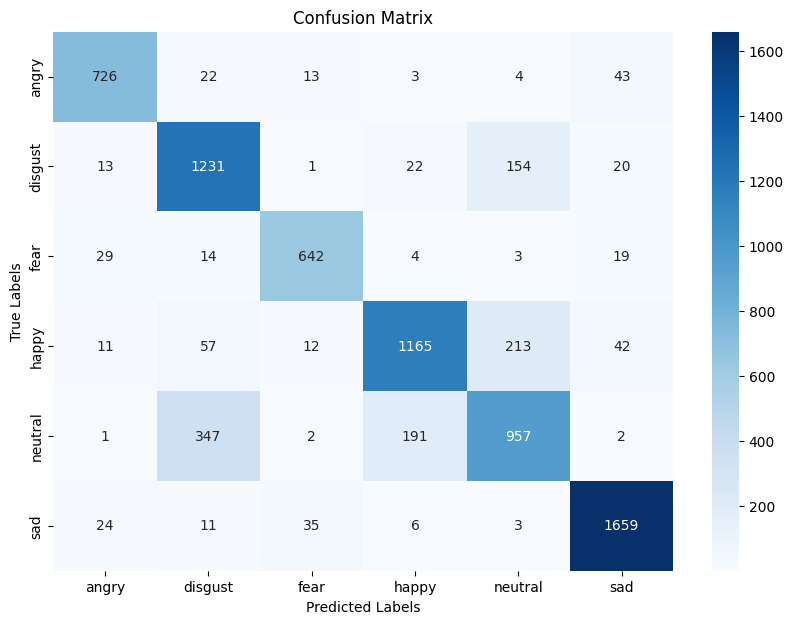

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# {'fear': 2, 'happy': 3, 'sad': 5, 'neutral': 4, 'angry': 0, 'disgust': 1}
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [45]:
new_text = "im happy today"
inputs = tokenizer(new_text, return_tensors="pt", padding=True, truncation=True, max_length=70)

In [46]:
inputs = {key: value.to(device) for key, value in inputs.items()}
with torch.no_grad():
    logits = model(**inputs).logits


In [47]:
probabilities = softmax(logits.cpu().numpy()[0])

inverted_sentiment_mapping = {v: k for k, v in sentiment_mapping.items()}

formatted_output = "\n".join(f"{inverted_sentiment_mapping[i]} {probabilities[i]*100:.6f}" for i in range(len(probabilities)))

print(formatted_output)


anger 0.133272
disgust 0.464357
fear 0.314997
happy 94.347978
neutral 4.494506
sad 0.244888
